In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma=1
e=1
def d_V_lj_dr(r, epsilon, sigma):    
    return (-48 * epsilon * np.power(sigma, 12) / np.power(r, 13) + 24 * epsilon * np.power(sigma, 6) / np.power(r, 7))

def V_lj(r,epsilon, sigma):
    return (4*epsilon * (np.power(sigma, 12) / np.power(r, 12) - np.power(sigma, 6) / np.power(r, 6)))

#find abs value of force 
def modulus(a):
    sum=0
    for i in a:
        sum=sum+i*i
    
    return np.sqrt(sum)
    
Tol=1e-2
#err=1


N=11
f_s=np.zeros(N)
h=1e-5

E_p=[]
   
#calculate energy
def Enrgy(q_s,N,e, sigma):
    E=0
    for i in range(N):
        for j in range(N):
            if i!=j:
                r_ij=(abs(q_s[i]-q_s[j]))
                E=E+ 0.5*V_lj(r_ij,e, sigma)
    return E

# calculate force
def force(q_s,N,e, sigma):    
    for i in range(N):
        f_0=0
        for j in range(N):
            if i!=j:
                r_ij=abs(q_s[i]-q_s[j])
                f_0=f_0+(-d_V_lj_dr(r_ij,e,sigma))*((q_s[i]-q_s[j])/(abs(q_s[i]-q_s[j])))
        f_s[i]=f_0
    return f_s

a=1
energy=[]
q_s= [i*a for i in range(N)]
fs=(force(q_s,N,e, sigma))
err=modulus(fs)
#print(err)
while err>Tol:    
    for i in range(N):        
        q_s[i]=q_s[i]+h*f_s[i]        
    f_s=force(q_s,N,e,sigma)
    
    err=modulus(f_s)
    #print(err)
    energy.append(Enrgy(q_s,N,e,sigma))
print(q_s)
#print(force(q_s,N,e,sigma))
#print(Enrgy(q_s,N,e,sigma))


[-0.5973836893208203, 0.5234667863163838, 1.6427507965512647, 2.7618772510306067, 3.8809501937657997, 5.0, 6.119049806234222, 7.23812274896942, 8.357249203448776, 9.47653321368366, 10.597383689320848]


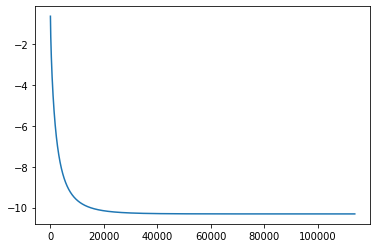

In [3]:
plt.plot(energy)

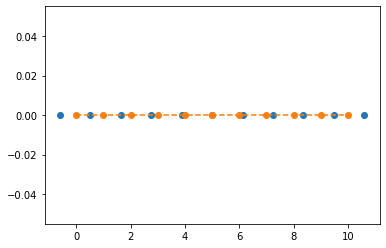

In [4]:
x=np.zeros_like(q_s)
a=1
u_0 = [i*a for i in range(N)]
plt.plot(q_s,x,"o")
plt.plot(u_0,x,"o--")